In [1]:
from mpc import *
from IPython.display import display, Markdown, Latex

### Simulation parameters
Defines the total simulation time and sampling time.

In [2]:
# Total simulation time: 24h (1440m)
total_time = 1440  

# Sampling time: 1m
t_step = 5

# Number of control step: total_time/t_step = 1440
steps = int(total_time/t_step) 

# Get average trajectory every 240 m
avg_period = 240  

# Initial conditions
x_0 = np.array([30, 50, 400, 125, 0, 0])

# References
LacI_ref = 750
TetR_ref = 300


## Demonstration of the infeasibility 
Demonstrates the infeasibility of a linear MPC control applied to the non-linear system.

In [3]:
u1 = np.zeros(steps)
u2 = np.zeros(steps)

with open('./data/linear/results0.json') as f:
    data = json.load(f)
    u1[:] = data['inputs']['aTc']
    u2[:] = data['inputs']['IPTG']

u = np.array([[u1[i], u2[i]] for i in range(steps)])

In [4]:
setup_mpc = {
    'n_robust': 1,
    'n_horizon': 7,
    't_step': t_step,
    'store_full_solution': True,
}

toggle = ToggleSwitchModel(False, LacI_ref, TetR_ref, t_step, total_time, avg_period)
mpc_controller = ControllerMPC(toggle, t_step, setup_mpc, False)


In [ ]:
%%capture
mpc_controller.execute_trajectory(x_0, steps, 'infeasible', u)

### Performance metrics and results plot
It calculates ISE and ITAE values and plots closed-loop simulations.

#### Performance metrics


<center>

| **Metric** | **Value** |
|------------|-----------|
| ISE        | 1932.89     |
| ITAE       | 4.31e+05    |


#### Results plot

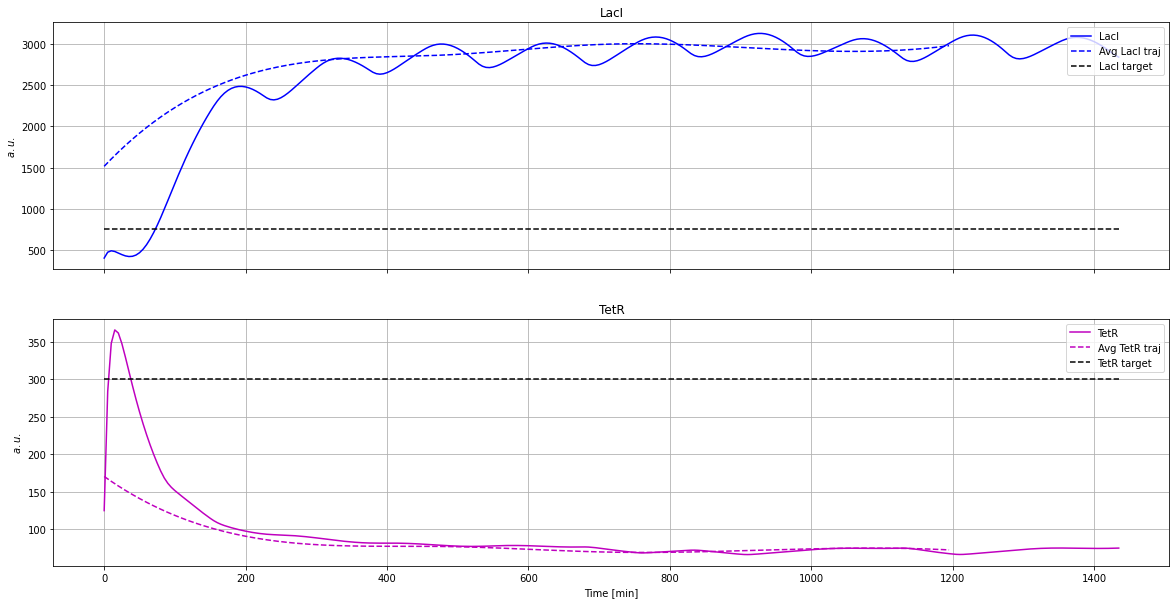

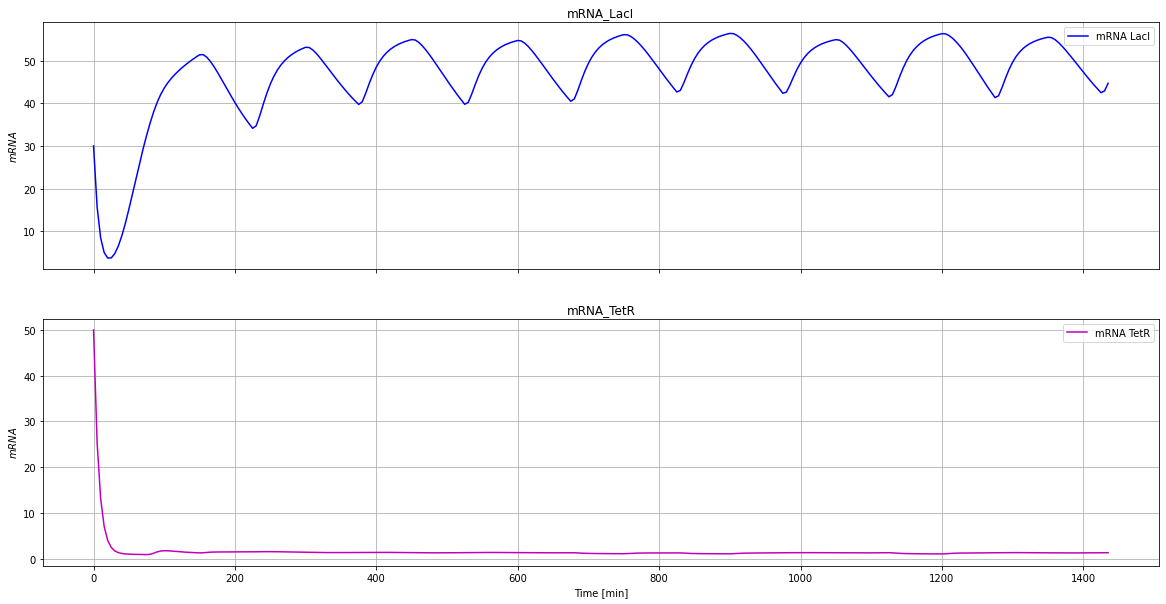

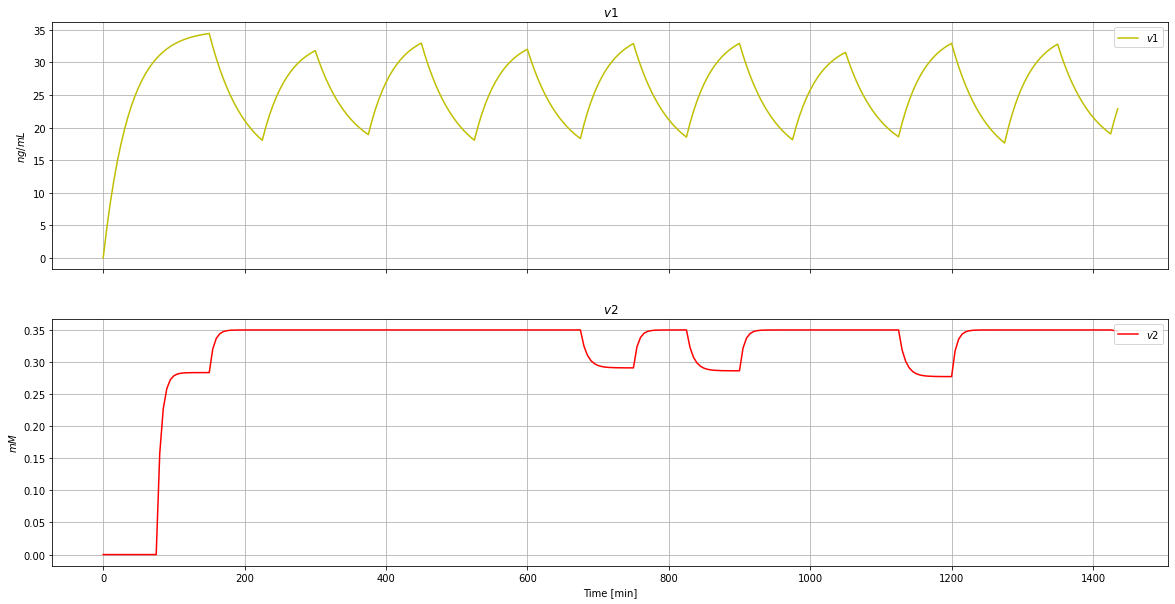

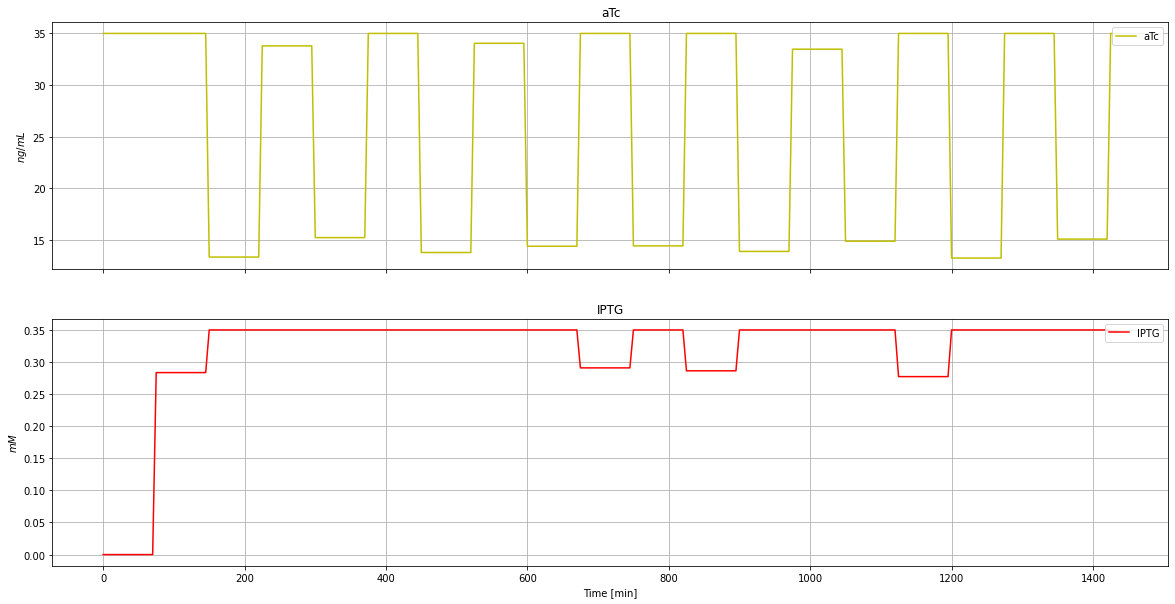

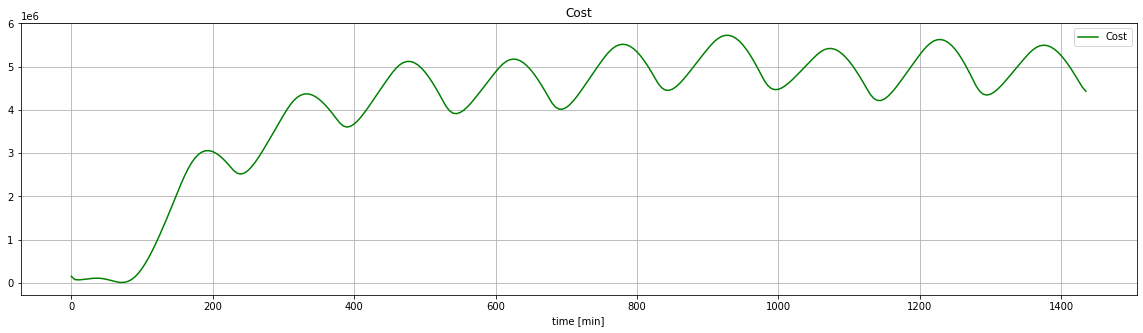

In [5]:
display(Markdown('#### Performance metrics'))
metrics = """
<center>

| **Metric** | **Value** |
|------------|-----------|
| ISE        | {ISE}     |
| ITAE       | {ITAE}    |
""".format(ISE="{:.2f}".format(toggle.trajectories['ISE']), ITAE=format(toggle.trajectories['ITAE'], '.2e'))

display(Markdown(metrics))

display(Markdown('#### Results plot'))
figures, lines = toggle.plot_results()


### Plots animation
It animates closed-loop simulations and exports them in mp4 format.

In [6]:
toggle.animate_results('infeasible', 'proteins', toggle.update_protein, figures[0], (toggle.trajectories, lines[0:6], np.arange(0, total_time - ((total_time-1) % avg_period) - 1, t_step)), steps)
toggle.animate_results('infeasible', 'mRNAs', toggle.update_mRNA, figures[1], (toggle.trajectories, lines[6:8]), steps)
toggle.animate_results('infeasible', 'internal_inducers', toggle.update_internal_inducers, figures[2], (toggle.trajectories, lines[8:10]), steps)
toggle.animate_results('infeasible', 'external_inducers', toggle.update_external_inducers, figures[3], (toggle.trajectories, lines[10:12]), steps)
toggle.animate_results('infeasible', 'cost', toggle.update_cost, figures[4], (toggle.trajectories, lines[12:13]), steps)